<a href="https://colab.research.google.com/github/CPernet/OpenNeuro_MetaPrivAssessment/blob/main/EarlyStressfulExperiencesInChildren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Link to the repo and import local data and library

In [4]:
# Import Libraries
!git clone https://github.com/CPernet/OpenNeuro_MetaPrivAssessment.git

import sys
sys.path.append("..")
import os
os.chdir('OpenNeuro_MetaPrivAssessment') # Change directory to the cloned repository

Cloning into 'OpenNeuro_MetaPrivAssessment'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 171 (delta 63), reused 97 (delta 18), pack-reused 0 (from 0)
Receiving objects: 100% (171/171), 2.59 MiB | 6.52 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [5]:
%%bash
set -e
sudo apt-get update -qq
sudo DEBIAN_FRONTEND=noninteractive \
     apt-get install -qq -y --no-install-recommends r-base r-base-dev

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import spearmanr, kendalltau, linregress
import warnings
warnings.filterwarnings('ignore')
!pip install piflib
import logging
logging.getLogger('rpy2.rinterface_lib.callbacks').setLevel(logging.ERROR)
!pip install -q rpy2
import metaprivBIDS_stat as ST
from metaprivBIDS_stat import plot_calc
from metaprivBIDS_stat import rst_outlier_case2

## Import result files from metaprivBIDS App analysis
STRESS is the raw dataset - the race variable is remaped for simplicity of use.

In [7]:
STRESS = 'https://s3.amazonaws.com/openneuro.org/ds004228/phenotype/questionnaires.tsv?versionId=SdOOI_jJreOTd9M9UsxjhcUPtFoA4Zvy'
STRESS = pd.read_csv(STRESS, sep='\t')
STRESS['age_scan'] = STRESS['age_scan'].astype(int)
# Make race components into one column for simplicity.
race_mapping = {
    'black': 'Black',
    'white': 'White',
    'asian': 'Asian',
    'multiracial': 'Multiracial',
    'other': 'Other'
}

# Initialize 'Race' column with 'Unknown'
STRESS['Race'] = 'Unknown'

# Update 'Race' column based on conditions
for column, race in race_mapping.items():
    STRESS.loc[STRESS[column] == 1, 'Race'] = race

# Drop the original binary columns if no longer needed
STRESS = STRESS.drop(columns=race_mapping.keys())
STRESS.drop(columns=['hispanic'], inplace=True)
STRESS.to_csv('EarlyStressfulExperiencesInChildren/data_ds004228/STRESS_dataset_ds004228.csv', sep=',', index=False)

The selected quasi identifers are:
    
- age_scan
- parent1_edu
- Race
- income_median
- parent2_edu
- male
- income_rank


The selected sensitive variables are:
- Race


In [8]:
suda = pd.read_csv('EarlyStressfulExperiencesInChildren/data_ds004228/suda_ds004228.csv', sep=',')
pif = pd.read_csv('EarlyStressfulExperiencesInChildren/data_ds004228/pif_ds004228.csv', sep=',',index_col='Unnamed: 0').sort_index()
suda_field_score =  pd.read_csv('EarlyStressfulExperiencesInChildren/data_ds004228/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
k_combined_field =  pd.read_csv('EarlyStressfulExperiencesInChildren/data_ds004228/normalized_difference_stress.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
k_combined_all = pd.read_csv('EarlyStressfulExperiencesInChildren/data_ds004228/k-combined-3-7.csv', sep=',')
k_combined_field_non_risk = pd.read_csv('EarlyStressfulExperiencesInChildren/data_ds004228/non_normalized_difference_results.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})

# T-test between risky and non-risky k-global values for variables.


### Non risk variables

In [10]:
k_combined_field_non_risk

,variable,Normalized Difference
0,piper_motion,0.0
1,pos_affect_HO_amyg,0.0
2,neg_affect_HO_amyg,0.0
3,parent_child_HO_amyg,0.0
4,parent_child_ses_zstat1,0.0
5,pos_affect_neg_parent_zstat2_1,0.0
6,pos_affect_neg_parent_zstat2_2,0.0
7,pos_parent,0.0
8,pos_content_avg,0.0
9,pos_affect_avg,0.0


### Risk Variables

In [11]:
k_combined_field

,variable,Normalized Difference
0,age_scan,1.8
1,parent1_edu,1.0
2,Race,0.4
3,income_median,0.0
4,parent2_edu,0.0
5,male,0.0
6,income_rank,0.0


In [13]:
k_combined_field_non_risk

,variable,Normalized Difference
0,piper_motion,0.0
1,pos_affect_HO_amyg,0.0
2,neg_affect_HO_amyg,0.0
3,parent_child_HO_amyg,0.0
4,parent_child_ses_zstat1,0.0
5,pos_affect_neg_parent_zstat2_1,0.0
6,pos_affect_neg_parent_zstat2_2,0.0
7,pos_parent,0.0
8,pos_content_avg,0.0
9,pos_affect_avg,0.0


## Result of Paired T-test

In [14]:
mean_risk_values = (k_combined_field['Normalized Difference']).mean()
print('Mean, risk identifiers:',mean_risk_values)

mean_risk_values = (k_combined_field_non_risk['Normalized Difference']).mean()
print('Mean, non-risk identifiers:',mean_risk_values)

t, p = stats.ttest_ind(k_combined_field['Normalized Difference'], k_combined_field_non_risk['Normalized Difference'])
print('t:',t,'p-value:', p)

Mean, risk identifiers: 0.45714285714285713
Mean, non-risk identifiers: 0.0
t: 2.785919757914012 p-value: 0.010774332265923062


# Outlier detection for PIF & SUDA

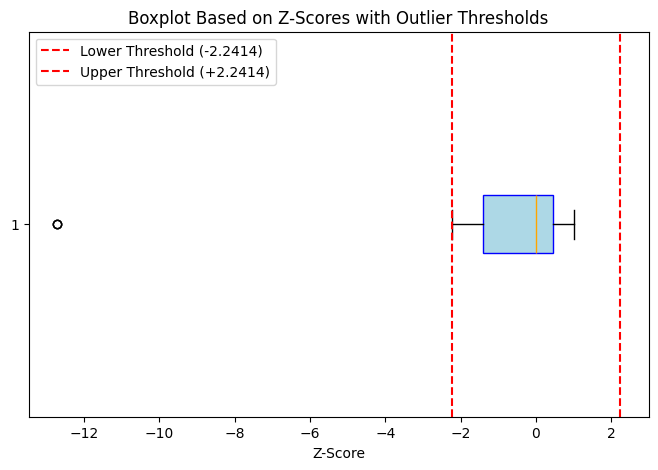

number of outliers found 0


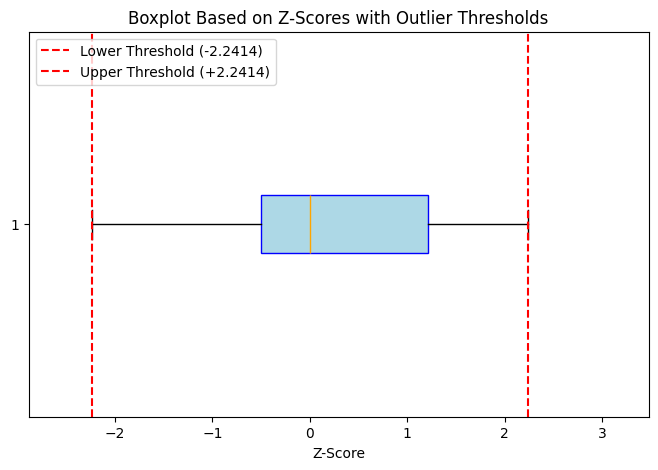

number of outliers found 2
Joint outlier indices: []


In [33]:
# SUDA outliers
results_suda = ST.rst_outlier_case2(suda, 'dis-score')
above_SUDAoutlier_indices = set(results_suda[4]) # Assuming the 4th element (index 3) is the list of outlier indices
print('number of outliers found',len(above_SUDAoutlier_indices))

#PIF outliers
results_pif = ST.rst_outlier_case2(pif, 'RIG')
above_PIFoutlier_indices = set(results_pif[4]) # Assuming the 4th element (index 3) is the list of outlier indices
print('number of outliers found',len(above_PIFoutlier_indices))

# Find the intersection of the two sets
joint_outlier_indices_set = above_SUDAoutlier_indices.intersection(above_PIFoutlier_indices)
joint_outlier_indices = list(joint_outlier_indices_set)
print("Joint outlier indices:", joint_outlier_indices)

Exemple of an outlier

In [41]:
list_above_PIFoutlier_indices = list(above_PIFoutlier_indices)
STRESS.loc[list_above_PIFoutlier_indices[1]]

,7
participant_id,sub-08
dataset,1
age_scan,9
male,0
parent1_edu,16.0
parent2_edu,10.0
income_rank,1.0
income_median,8500.0
les_1y_sum,15.0
parent,mom


## Calculate Pearson and Spearman correlation on field and row level.


        ROW LEVEL CORRELATION      

Spearman Rank Correlation between suda & pif: 0.82, P-value: 0.0000
Kendall's Tau between suda & pif: 0.63, p-value: 0.0000
Pearson Correlation between suda & pif: 0.4724


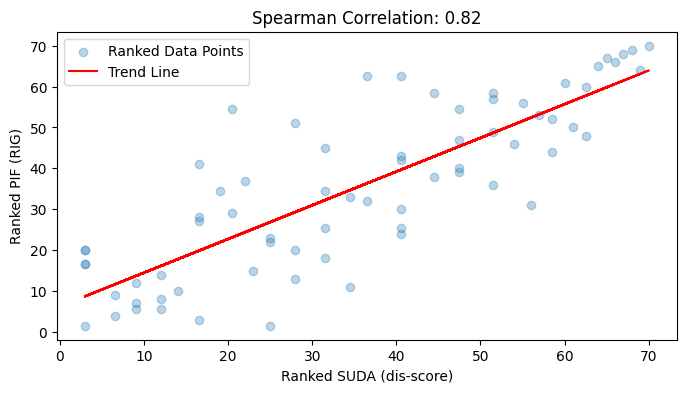

____________________________________________________________________________________

      FIELD LEVEL CORRELATIONS     

Pearson Correlation between SUDA & PIF field level: 0.62
Pearson Correlation between K-combined & PIF field level: 0.21
Pearson Correlation between SUDA & K-combined field level: 0.63


Spearman Rank Correlation between PIF & SUDA: 0.46, P-value: 0.2939
Spearman Rank Correlation between PIF & K: -0.02, P-value: 0.9666
Spearman Rank Correlation between SUDA & K: 0.39, P-value: 0.3817


In [9]:
ST.stats(suda, pif, suda_field_score, k_combined_field)

## Iterating through all possible combination of variables & calculating the correlation between SUDA, K-Global and PIF

In [42]:
sum_score_df  = ST.calculate_summed_dis_scores(k_combined_all, STRESS, sample_fraction=0.3, missing_value= np.nan)

Spearman Correlation between Suda sum and K-combined: 0.19
Pearson Correlation between Suda sum and K-combined: 0.10


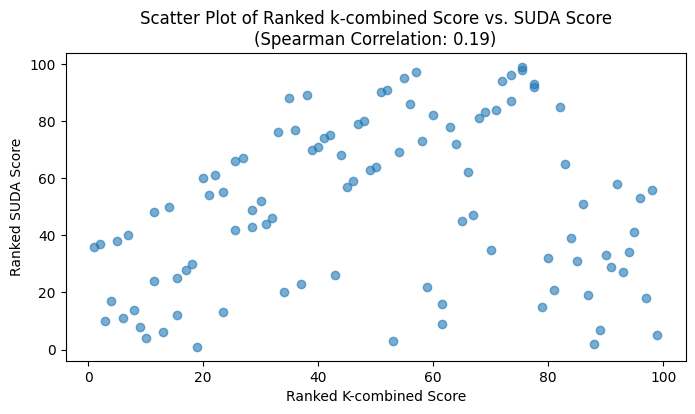

________________________________________________________________________


Spearman Correlation between PIF 95% and K-combined: 0.49
Pearson Correlation between PIF 95% and K-combined: 0.38


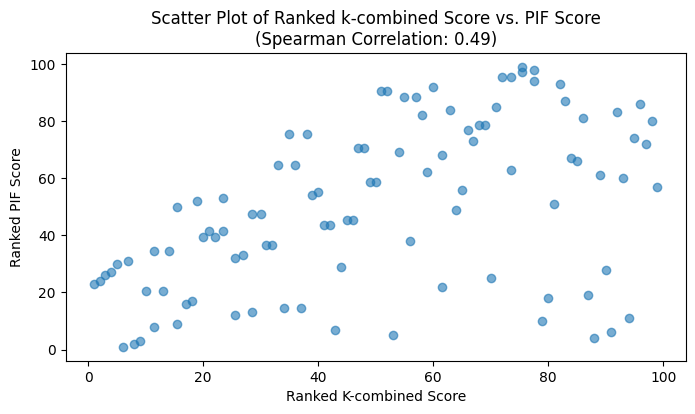

________________________________________________________________________


Spearman Correlation between PIF 95% and SUDA: 0.71
Pearson Correlation between PIF 95% and SUDA: 0.74


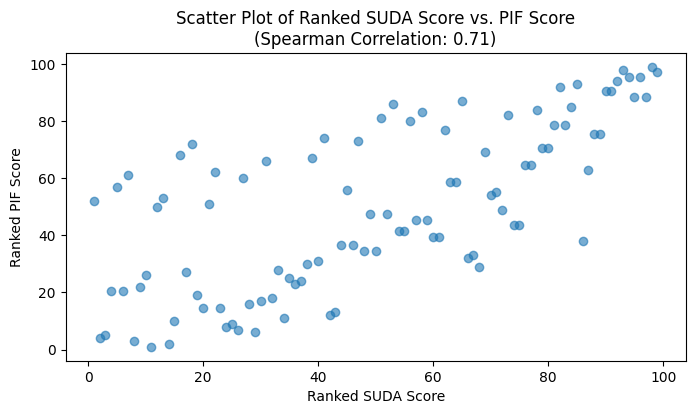

In [43]:
plot_calc(sum_score_df)